In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
df = pd.read_csv("Data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


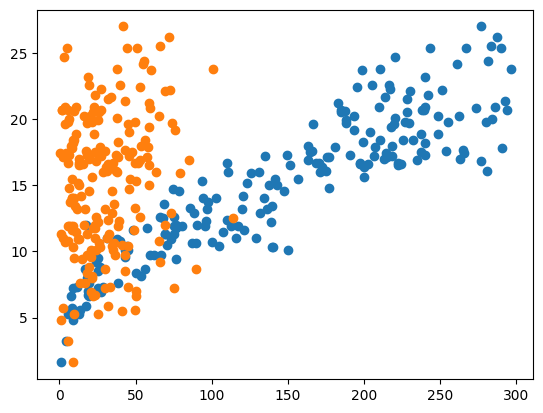

In [21]:
plt.scatter(x=df['TV'], y=df['Sales'])
plt.scatter(x=df['Newspaper'], y=df['Sales'])

In [26]:
# Sploting data in training and testing
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1], test_size=0.2, random_state=38)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [30]:
# Training model
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [32]:
# Getting predictions to check for model accuracy
y_pred = lr.predict(x_test)
y_pred

array([20.68154109, 22.73266264, 21.43398387, 20.87644373, 15.25006717,
       17.8554286 ,  8.52003382, 15.20067409, 21.41947719, 17.13330181,
        9.82067234, 18.25039009,  9.48827639, 17.88145258,  7.74637186,
       10.07104791, 17.15199039, 18.88207675,  8.82199886, 12.45132614,
       20.02168095, 19.25338114, 12.11847476, 12.29449915, 21.10960894,
       14.7133038 , 13.41874447, 16.47479975, 12.43660255, 15.8535729 ,
       12.44811169, 18.07083081,  9.73846016,  9.51516107, 15.81993585,
       13.22376284,  6.29162104, 11.19030892, 10.55085937, 15.97215701])

In [33]:
mean_absolute_error(y_test, y_pred)

1.0682584411152853

In [34]:
r2_score(y_test, y_pred) # 90% accuracy of model found

0.9009780495407889

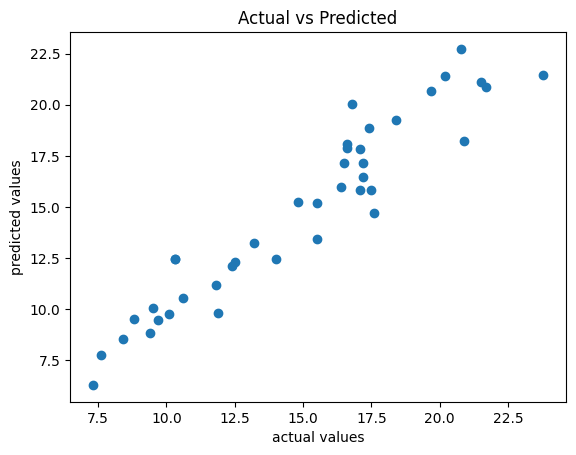

In [37]:
# mean absolute error graph
plt.scatter(y_test,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Actual vs Predicted')
plt.show()

In [39]:
# function for prediction
def predict_sales(tv_budget, radio_budget, newspaper_budget):
    features = np.array([[tv_budget, radio_budget, newspaper_budget]])
    return lr.predict(features).reshape(1, -1)

In [41]:
predict_sales(230.1, 37.8, 69.2)

C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21.29085906]])

# Saving LinearRegression Model

In [46]:
import pickle

pickle.dump(lr, open("myFirstModel.pkl", "wb"))